In [ ]:
# load_data.py
import pandas as pd

def load_dataset(file_path):
    df = pd.read_excel(file_path)
    return df

if __name__ == "__main__":
    df = load_dataset("AGB_Data.xlsx")
    print(df.head())

    NDVI  TNDVI     SR   SAVI  MSAVI2        AGB
0 -0.072  0.654  0.866 -0.108  -0.154   7.158685
1 -0.072  0.654  0.866 -0.108  -0.154  12.112405
2 -0.056  0.666  0.894 -0.084  -0.118  21.010835
3 -0.048  0.672  0.908 -0.072  -0.101  24.553987
4 -0.041  0.678  0.922 -0.061  -0.084  25.799105


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('AGB', axis=1)
y = df['AGB']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5/55, random_state=42)

print(f"train: {X_train.shape[0]} test: {X_test.shape[0]}")

train: 50 test: 5


Linear Regression Model
R²  : 0.4104
RMSE: 11.0756
MAE : 7.6334


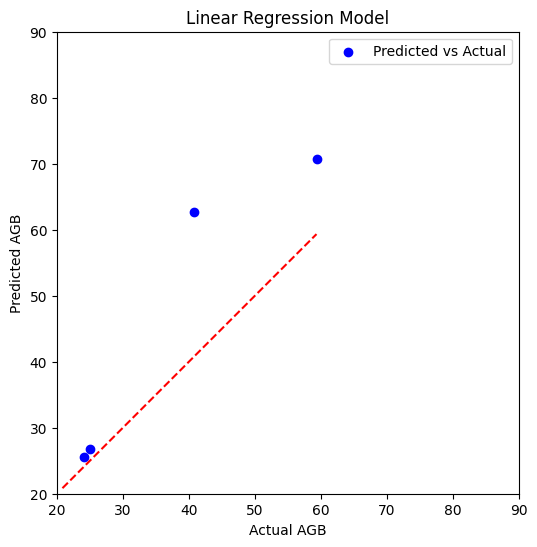

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined
# from the train-test split in cell WHW_yv4MkK-V

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression Model")
print(f"R²  : {r2_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"MAE : {mae_linear:.4f}")

# Optional: Plotting the results for this specific model
plt.figure(figsize=(6, 6)) # Set figure size
plt.scatter(y_test, y_pred_linear, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--") # Set ideal fit line range from min to max of y_test
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Linear Regression Model")
plt.legend()

# Set axis limits and equal aspect ratio
plt.xlim(20, 90)
plt.ylim(20, 90)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
# model_random_forest.py
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Remove redundant data loading and splitting
# X_train, X_test, y_train, y_test = prepare_data("AGB_Data.xlsx")

# สร้างและเทรนโมเดล
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# ทำนายค่า
y_pred_rf = rf_reg.predict(X_test)

# แสดงค่าความแม่น
print("Random Forest Regressor")
print(f"R²  : {r2_score(y_test, y_pred_rf):.4f}")
# Fix: Calculate RMSE by taking the square root of MSE instead of using squared=False
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_rf):.4f}")

# วาดกราฟ Predicted vs Actual
'''plt.figure(figsize=(6,6)) # Set figure size to 6x6
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit') # Ideal fit line from min to max of y_test
plt.xlabel('Actual AGB')
plt.ylabel('Predicted AGB')
plt.title('Random Forest Regressor')
plt.legend()

# Set axis limits and equal aspect ratio
plt.xlim(20, 90)
plt.ylim(20, 90)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()'''

Random Forest Regressor
R²  : 0.7082
RMSE: 7.7912
MAE : 5.6305


"plt.figure(figsize=(6,6)) # Set figure size to 6x6\nplt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual')\nplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit') # Ideal fit line from min to max of y_test\nplt.xlabel('Actual AGB')\nplt.ylabel('Predicted AGB')\nplt.title('Random Forest Regressor')\nplt.legend()\n\n# Set axis limits and equal aspect ratio\nplt.xlim(20, 90)\nplt.ylim(20, 90)\nplt.gca().set_aspect('equal', adjustable='box')\nplt.show()"

In [ ]:
# model_xgboost.py
# Remove redundant data loading and splitting
# from prepare_data import prepare_data
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy for sqrt

# X_train, X_test, y_train, y_test = prepare_data("AGB_Data.xlsx")

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

# Fix: Calculate RMSE by taking the square root of MSE instead of using squared=False
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost -> R²: {r2:.4f}, RMSE: {rmse:.4f}")

'''plt.figure(figsize=(6,6)) # Set figure size
plt.scatter(y_test, y_pred_xgb, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("XGBoost Regression")

# Set axis limits and equal aspect ratio
plt.xlim(20, 90)
plt.ylim(20, 90)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()'''

XGBoost -> R²: 0.5530, RMSE: 9.6432


'plt.figure(figsize=(6,6)) # Set figure size\nplt.scatter(y_test, y_pred_xgb, color="orange")\nplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")\nplt.xlabel("Actual AGB")\nplt.ylabel("Predicted AGB")\nplt.title("XGBoost Regression")\n\n# Set axis limits and equal aspect ratio\nplt.xlim(20, 90)\nplt.ylim(20, 90)\nplt.gca().set_aspect(\'equal\', adjustable=\'box\')\n\nplt.show()'

In [ ]:
# model_svr.py
# Remove redundant data loading and splitting
# from prepare_data import prepare_data
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy for sqrt

# X_train, X_test, y_train, y_test = prepare_data("AGB_Data.xlsx")

model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)
y_pred_svr = model.predict(X_test)

# Fix: Calculate RMSE by taking the square root of MSE instead of using squared=False
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print(f"SVM (RBF Kernel) -> R²: {r2:.4f}, RMSE: {rmse:.4f}")

'''plt.figure(figsize=(6,6)) # Set figure size
plt.scatter(y_test, y_pred_svr, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Support Vector Ma(RBF)")

# Set axis limits and equal aspect ratio
plt.xlim(20, 90)
plt.ylim(20, 90)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()'''

SVM (RBF Kernel) -> R²: 0.8984, RMSE: 4.5985


'plt.figure(figsize=(6,6)) # Set figure size\nplt.scatter(y_test, y_pred_svr, color="purple")\nplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")\nplt.xlabel("Actual AGB")\nplt.ylabel("Predicted AGB")\nplt.title("Support Vector Ma(RBF)")\n\n# Set axis limits and equal aspect ratio\nplt.xlim(20, 90)\nplt.ylim(20, 90)\nplt.gca().set_aspect(\'equal\', adjustable=\'box\')\n\nplt.show()'

In [ ]:
# model_decision_tree.py
# Remove redundant data loading and splitting
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy for sqrt

model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

# Fix: Calculate RMSE by taking the square root of MSE instead of using squared=False
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree -> R²: {r2:.4f}, RMSE: {rmse:.4f}")

'''plt.figure(figsize=(6,6)) # Set figure size
plt.scatter(y_test, y_pred_dt, color="brown")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Decision Tree Regression")

# Set axis limits and equal aspect ratio
plt.xlim(20, 90)
plt.ylim(20, 90)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()'''

Decision Tree -> R²: 0.5932, RMSE: 9.1997


'plt.figure(figsize=(6,6)) # Set figure size\nplt.scatter(y_test, y_pred_dt, color="brown")\nplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")\nplt.xlabel("Actual AGB")\nplt.ylabel("Predicted AGB")\nplt.title("Decision Tree Regression")\n\n# Set axis limits and equal aspect ratio\nplt.xlim(20, 90)\nplt.ylim(20, 90)\nplt.gca().set_aspect(\'equal\', adjustable=\'box\')\n\nplt.show()'

Linear Regression (TNDVI and Cube Root AGB)
R²  : 0.6823
RMSE: 0.2420
MAE : 0.1900


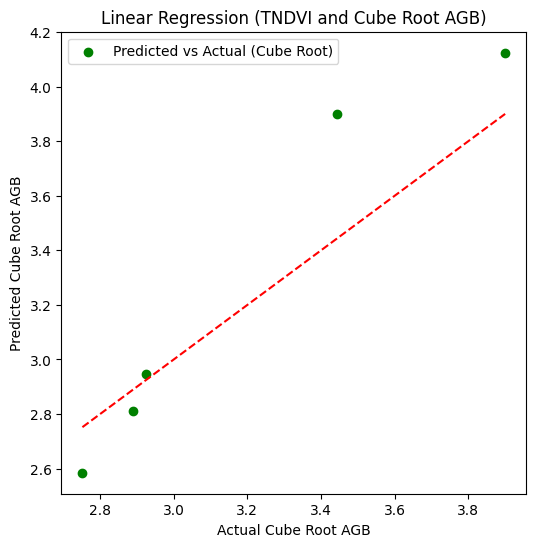

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data with TNDVI as feature and cube root of AGB as target
X_tndvi = df[['TNDVI']]
y_cube_root_agb = np.cbrt(df['AGB'])

# Split data
X_train_tndvi, X_test_tndvi, y_train_cube_root_agb, y_test_cube_root_agb = train_test_split(
    X_tndvi, y_cube_root_agb, test_size=5/55, random_state=42
)

# Train model
model_tndvi_cube_root = LinearRegression()
model_tndvi_cube_root.fit(X_train_tndvi, y_train_cube_root_agb)
y_pred_cube_root_agb = model_tndvi_cube_root.predict(X_test_tndvi)

# Metrics
mse_tndvi_cube_root = mean_squared_error(y_test_cube_root_agb, y_pred_cube_root_agb)
rmse_tndvi_cube_root = np.sqrt(mse_tndvi_cube_root)
r2_tndvi_cube_root = r2_score(y_test_cube_root_agb, y_pred_cube_root_agb)
mae_tndvi_cube_root = mean_absolute_error(y_test_cube_root_agb, y_pred_cube_root_agb)


print("Linear Regression (TNDVI and Cube Root AGB)")
print(f"R²  : {r2_tndvi_cube_root:.4f}")
print(f"RMSE: {rmse_tndvi_cube_root:.4f}")
print(f"MAE : {mae_tndvi_cube_root:.4f}")

# Visualization
plt.figure(figsize=(6, 6))
plt.scatter(y_test_cube_root_agb, y_pred_cube_root_agb, color="green", label="Predicted vs Actual (Cube Root)")
plt.plot([y_test_cube_root_agb.min(), y_test_cube_root_agb.max()], [y_test_cube_root_agb.min(), y_test_cube_root_agb.max()], "r--")
plt.xlabel("Actual Cube Root AGB")
plt.ylabel("Predicted Cube Root AGB")
plt.title("Linear Regression (TNDVI and Cube Root AGB)")
plt.legend()

# Set axis limits and equal aspect ratio
# plt.xlim(20, 100) # Removed
# plt.ylim(20, 100) # Removed
# plt.gca().set_aspect('equal', adjustable='box') # Removed


plt.show()

In [ ]:
import pandas as pd

# Create a dictionary to store the metrics for each model
metrics_data = {
    'Model': ['Linear Regression (All Features)', 'Random Forest Regressor', 'XGBoost Regressor', 'Support Vector Regression (RBF)', 'Decision Tree', 'Linear Regression (TNDVI and Cube Root AGB)'],
    'R²': [r2_linear, r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb), r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_dt), r2_tndvi_cube_root],
    'RMSE': [rmse_linear, np.sqrt(mean_squared_error(y_test, y_pred_rf)), np.sqrt(mean_squared_error(y_test, y_pred_xgb)), np.sqrt(mean_squared_error(y_test, y_pred_svr)), np.sqrt(mean_squared_error(y_test, y_pred_dt)), rmse_tndvi_cube_root],
    'MAE': [mae_linear, mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_xgb), mean_absolute_error(y_test, y_pred_svr), mean_absolute_error(y_test, y_pred_dt), mae_tndvi_cube_root]
}

# Create a pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
display(metrics_df)

,Model,R²,RMSE,MAE
0,Linear Regression (All Features),0.410390,11.075616,7.633421
1,Random Forest Regressor,0.708234,7.791172,5.630508
2,XGBoost Regressor,0.553037,9.643201,6.149083
3,Support Vector Regression (RBF),0.898362,4.598470,3.390300
4,Decision Tree,0.593202,9.199723,5.084607
5,Linear Regression (TNDVI and Cube Root AGB),0.682319,0.241980,0.190034


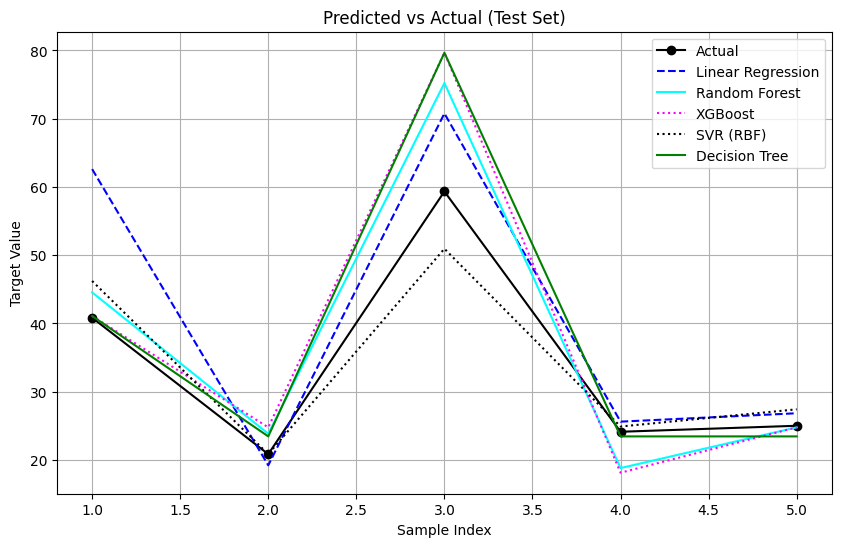

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample index (แกน x) ตามขนาดของ y_test
sample_index = np.arange(1, len(y_test) + 1)

plt.figure(figsize=(10, 6))

# เก็บสีและสไตล์ของแต่ละ model
colors = {
    'Linear Regression': 'blue',
    'Random Forest': 'cyan',
    'XGBoost': 'magenta',
    'SVR (RBF)': 'black',
    'Decision Tree': 'green',
}

linestyles = {
    'Linear Regression': 'dashed',
    'Random Forest': 'solid',
    'XGBoost': 'dotted',
    'SVR (RBF)': 'dotted',
    'Decision Tree': 'solid',
}

markers = {
    'Actual': 'o',
}

# Plot actual values
plt.plot(sample_index, y_test, color='black', marker='o', linestyle='-', label='Actual')

# Plot predicted values ของแต่ละ model
plt.plot(sample_index, y_pred_linear, color=colors['Linear Regression'], linestyle=linestyles['Linear Regression'], label='Linear Regression')
plt.plot(sample_index, y_pred_rf, color=colors['Random Forest'], linestyle=linestyles['Random Forest'], label='Random Forest')
plt.plot(sample_index, y_pred_xgb, color=colors['XGBoost'], linestyle=linestyles['XGBoost'], label='XGBoost')
plt.plot(sample_index, y_pred_svr, color=colors['SVR (RBF)'], linestyle=linestyles['SVR (RBF)'], label='SVR (RBF)')
plt.plot(sample_index, y_pred_dt, color=colors['Decision Tree'], linestyle=linestyles['Decision Tree'], label='Decision Tree')

plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("Predicted vs Actual (Test Set)")
plt.legend()
plt.grid(True)
plt.show()